### Análise Exploratória - Arezzo

<center><img width="60%" src="Arquivos/arezzo.png"></center>


## Análise dos Dados

Esta etapa tem por objetivo permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `Loja` - Nome da franquia
* `Periodo` - Qual trimestre é referido
* `Número Total de Lojas` - Número total de lojas no trimestre



### Importando os dados do dataset

In [2]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import math
from scipy import stats

%matplotlib inline
# tamanho dos gráficos
plt.rcParams["figure.figsize"] = [10,5]
# tamanho dos dados
plt.rcParams["font.size"] = 12
# tamanho das colunas a exibir os dados
pd.set_option('display.max_rows', 67)

# configurar a fonte
plt.rcParams['font.family'] = 'Arial'

# configurar as cores que usarei no plot
AZUL = "#003F5c" 
CINZA = "#9E9E9E"
CINZA_TEXTO = "#515151"

In [3]:
# importar o dataframe em xlsx
df = pd.read_excel("Arquivos/lojas_arezzo.xlsx")

## Análise Exploratória dos Dados

Na análise exploratória de dados será efetuada uma explanação inicial das variáveis contidas na dataset, e entenderemos dados referentes a informações de cunho geral.

In [4]:
# Visualizar as 5 primeiras entradas
df.head()

,Loja,Periodo,Número Total de Lojas
0,Arezzo,1Q10,243
1,Arezzo,2Q10,247
2,Arezzo,3Q10,252
3,Arezzo,4Q10,266
4,Arezzo,1Q11,266


In [5]:
# Visualizar o tamanho do dataframe
print("Entradas: ", df.shape[0])
print("Variáveis: ", df.shape[1])

Entradas:  173
Variáveis:  3


### Q1. Quais as lojas existentes?

In [6]:
df.Loja.unique()

array(['Arezzo', 'Schutz', 'Anacapri', 'Fiever', 'Alme', 'Vans',
       'Reserva Group'], dtype=object)

### Q2. Qual a quantidade de registros por loja?

In [7]:
df.Loja.value_counts()

Arezzo           50
Schutz           50
Anacapri         37
Alme             10
Vans             10
Fiever            9
Reserva Group     7
Name: Loja, dtype: int64

### Gráfico do crescimento das lojas ao longo dos períodos

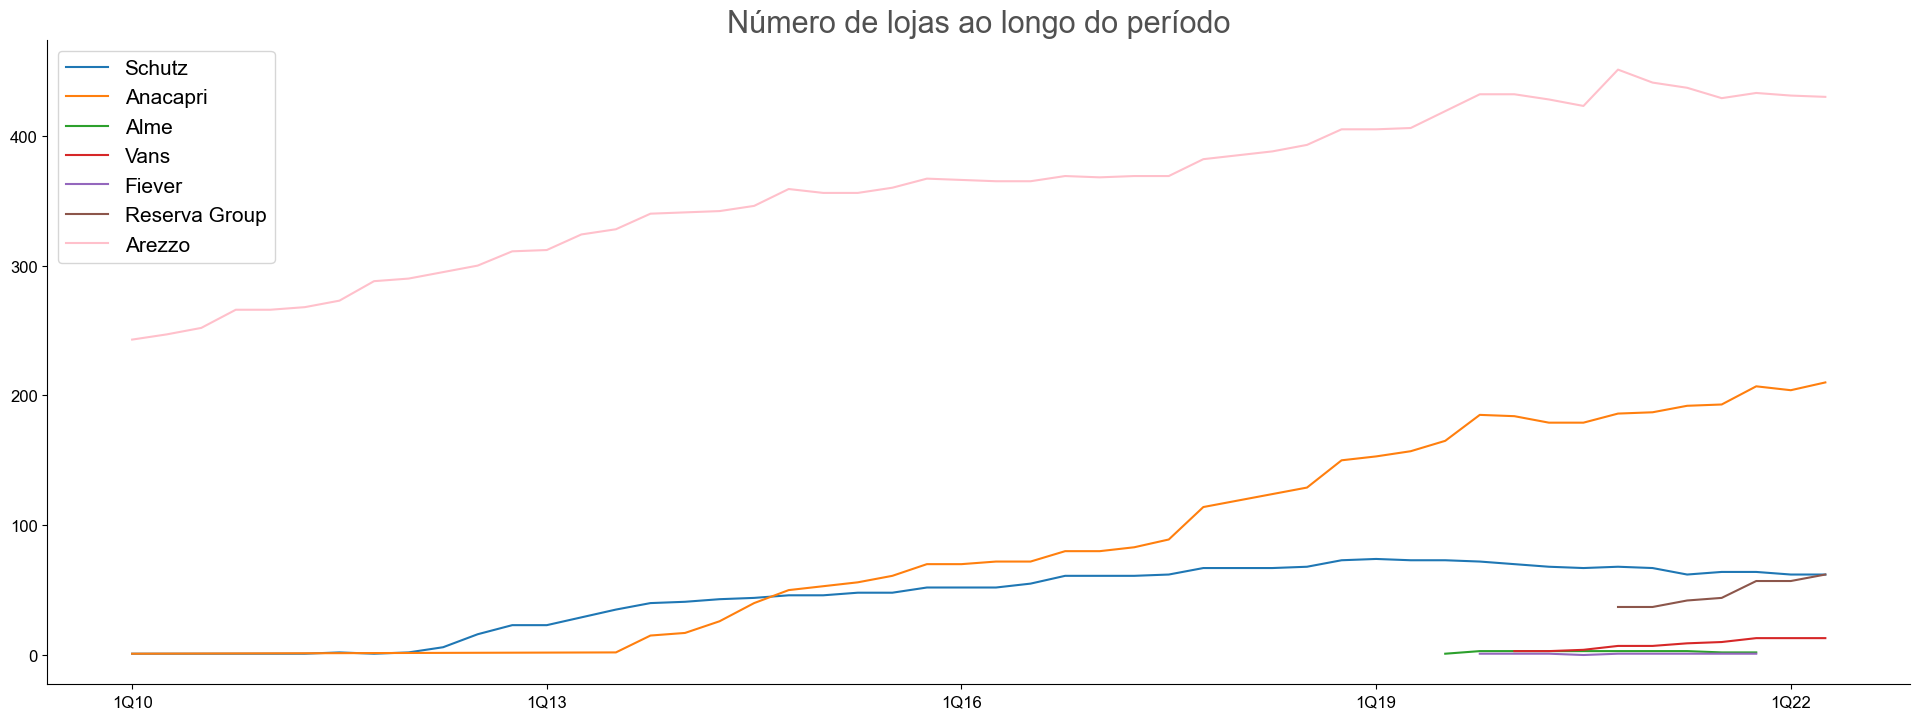

In [15]:
fig, ax = plt.subplots(figsize=(20, 8))

arezzo = df.loc[df.Loja == 'Arezzo'][['Periodo', 'Número Total de Lojas']]
schutz = df.loc[df.Loja == 'Schutz'][['Periodo', 'Número Total de Lojas']]
anacapri = df.loc[df.Loja == 'Anacapri'][['Periodo', 'Número Total de Lojas']]
alme = df.loc[df.Loja == 'Alme'][['Periodo', 'Número Total de Lojas']]
vans = df.loc[df.Loja == 'Vans'][['Periodo', 'Número Total de Lojas']]
fiever = df.loc[df.Loja == 'Fiever'][['Periodo', 'Número Total de Lojas']]
reserva = df.loc[df.Loja == 'Reserva Group'][['Periodo', 'Número Total de Lojas']]

ax.grid(False)
ax.plot(schutz['Periodo'], schutz['Número Total de Lojas'], label = 'Schutz')
ax.plot(anacapri['Periodo'], anacapri['Número Total de Lojas'], label = 'Anacapri')
ax.plot(alme['Periodo'], alme['Número Total de Lojas'], label = 'Alme')
ax.plot(vans['Periodo'], vans['Número Total de Lojas'], label = 'Vans')
ax.plot(fiever['Periodo'], fiever['Número Total de Lojas'], label = 'Fiever')
ax.plot(reserva['Periodo'], reserva['Número Total de Lojas'], label = 'Reserva Group')
ax.plot(arezzo['Periodo'], arezzo['Número Total de Lojas'], c = 'pink', label = 'Arezzo')
ax.set_xticks(ticks = ['1Q10', '1Q13', '1Q16', '1Q19', '1Q22'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


ax.set_title('Número de lojas ao longo do período', fontsize=22, color=CINZA_TEXTO)
leg = plt.legend(loc='upper left', prop={'size': 15})

plt.tight_layout(pad = 3.0);

### Informações Relevantes

A Arezzo&Co tem como foco a busca por antecipar o desejo de consumo da mulher brasileira e possui um Modelo de Negócios diferenciado, no qual a estrutura de suprimentos, aliada à sua equipe de pesquisa e desenvolvimento, estão preparadas para
disponibilizar de 15 a 18 coleções por ano. Os produtos são disponibilizados nos pontos de venda semanalmente e de maneira gradual, possibilitando que as lojas tenham sempre novidades, o que, segundo a Companhia, estimula as visitas dos consumidores às lojas da marca.
Diferentemente das grandes empresas varejistas internacionais, no caso da Arezzo&Co todas as coleções são desenhadas internamente, o que possibilita essa constante inovação – fator este tão relevante e característico da marca. Ao mesmo
tempo, o conceito de fast fashion altamente adotado pela Companhia, garante que as coleções estejam sempre atualizadas com as últimas tendências da moda internacional, o que confere à Arezzo uma posição de destaque no mercado, principalmente em comparação com os seus concorrentes, que não adotam as mesmas práticas.

Os modelos de recebimento e fornecimento dos produtos da Arezzo&Co são realizados por meio de um processo de outsourcing, no qual a Companhia utiliza fábricas próprias para uma parte do processo produtivo, e fábricas independentes para
outra parte. As fábricas próprias atendem principalmente as marcas Alexandre Birman, Fiever e parte da Schutz, enquanto as independentes atendem as marcas Arezzo, Schutz e Anacapri.

Durante o ano são criados cerca de 11.500 modelos, dos quais 7.245 são selecionados pela equipe de produtos da Arezzo&Co e apresentados para a equipe comercial em conjunto com os operadores. Finalmente, 5.980 modelos destes são escolhidos para serem produzidos e serem disponibilizados nas lojas. Com isso, a empresa garante levar para seus consumidores apenas aqueles produtos de maior sucesso e mais adequados à moda do momento.

Sua estratégia de marketing envolve a constante presença de suas marcas na mídia especializada por meio da vinculação da marca à artistas em destaque no momento e da criação de lojas conceito instaladas estrategicamente nas principais
capitais brasileiras. A criação dessas flagship stores, por sua vez, tem como objetivo proporcionar uma maior visibilidade para as marcas da Companhia e fomentar as vendas das outras lojas franqueadas, das lojas próprias e das multimarcas.